In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import glob
import urllib.request
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, save_img, img_to_array, array_to_img
import os
import shutil
from PIL import Image
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.models import Model, load_model
from keras.layers.core import Dense
from keras.layers.pooling import GlobalAveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.layers import Input, Dropout


kind_list = ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian'
            ,'Ragdoll','Russian_Blue','Siamese','Sphynx',
        'american_bulldog','american_pit_bull_terrier','basset_hound','beagle','boxer',
        'chihuahua', 'english_cocker_spaniel','english_setter', 'german_shorthaired','great_pyrenees',
        'havanese','japanese_chin','keeshond','leonberger','miniature_pinscher','newfoundland','pomeranian',
        'pug', 'saint_bernard','samoyed','scottish_terrier','shiba_inu','staffordshire_bull_terrier',
        'wheaten_terrier','yorkshire_terrier']

path = os.getcwd()

#モデル読み込み
model_dir = path+'/model/'
model = load_model(model_dir + 'model_3-opt.hdf5', compile = False)

C:\Users\hamac\Desktop\python\content\images\Abyssinian\Abyssinian_5.jpg
1/1 [==============================] - 1s 746ms/step
Egyptian_Mauと予想。


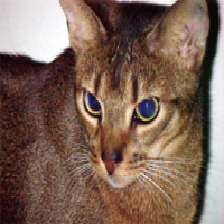

In [6]:
#画像読込
img_path = str(input())
img = load_img(img_path,target_size=(224, 224))
x = img_to_array(img)
y = np.expand_dims(x, axis=0)

#予測
features = model.predict(y)
pred_classes=np.argmax(features, axis=1)

pred_probs = np.max(features,axis=1)
pred_probs = ['{:.4f}'.format(i) for i in pred_probs]
a=float(pred_probs[0])

#予測確率0.7以下
if a<= 0.7:
    print(kind_list[pred_classes[0]]+'と予想。')
else:
    print(kind_list[pred_classes[0]] + '\n' + pred_probs[0])

#画像出力
Image.fromarray(np.uint8(x))